# DECISION TREE ALGORITHM.

Decision tree algorithm is a type of supervised machine learning model that classifies data by using true or false values to questions. It one of the simplest and most accurate model that when visualised gives a hierachial tree structure with three types of nodes ; root, internal node and leafs. 

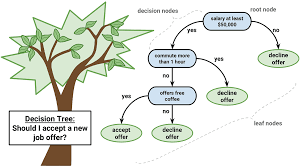

The **root node** sits at the top as a starting point, it represents the whole dataset or population from which a decision will be made resulting to a split. A split is characterised by a feature that best separates the data according to certain criterion i.e informtaion gain, Gini Impurity, and variance reduction. The root is the most critical part as it sets the foundation for branching aimed at making separations that give birth to child nodes with the highest purity.     